# Natural Language Processing with Disaster Tweets

### Table of Content
1. Introduction
2. Data Description
3. Exploratory Data Analysis (EDA)
   - 3.1 Importing Libraries and Loading Datasets
   - 3.2 Visualizing Data
   - 3.3 Data Cleaning
4. Model Architecture
   - 4.1 Compare GloVe, TF-IDF, Word2Vec
   - 4.2 Compare GRU, LSTM, Bi-RNN¶
   - 4.3 Setup GloVe Trained Model
   - 4.4 Loading and Embedding Text Data (GloVe)
   - 4.5 GRU-based Tweet Classifier
   - 4.6 GRU Model Training Workflow
   - 4.7 Loss and Accuracy Over Epochs
5. Results and Analysis
   - 5.1 Experiment Configurations
   - 5.2 Analysis
6. Conclusion
   - 6.1 Future Work
7. References

## 1. Introduction

**Title:** Natural Language Processing with Disaster Tweets

**Brief Description:**

**Overview of the Challenge:**
In this project, we tackle the challenge of distinguishing between tweets that report real disasters and those that do not. This problem is part of a Kaggle competition designed to help data scientists get started with Natural Language Processing (NLP). The dataset consists of tweets, each labeled as either relating to a real disaster (1) or not (0).

**Importance of Distinguishing Real Disaster Tweets from Non-Disaster Tweets:**
Twitter has become an essential platform for real-time communication, especially during emergencies. Agencies such as disaster relief organizations and news outlets rely on timely and accurate information to respond to disasters effectively. However, not all tweets that mention disaster-related terms are about actual disasters. Misinterpreting a tweet can lead to unnecessary panic or, conversely, a delayed response to a real emergency. Therefore, it is crucial to develop a system that can accurately identify tweets about real disasters.

**Goal:**
The primary goal of this project is to build a machine learning model that can predict whether a given tweet is about a real disaster or not. By doing so, we aim to improve the ability of agencies to monitor and respond to real-time emergencies more effectively.

## 2. Data Description

**Dataset Overview:**

The dataset for this project includes three main files:
- `train.csv`: This file contains the training data, which includes labeled tweets indicating whether they pertain to real disasters or not.
- `test.csv`: This file contains the test data, which we will use to make predictions and evaluate our model.
- `sample_submission.csv`: This file provides a sample format for how to structure the submission of our predictions.

**Explanation of the Columns:**

Each row in the `train.csv` and `test.csv` files represents a single tweet with the following columns:
- **id:** A unique identifier for each tweet.
- **text:** The text content of the tweet.
- **location:** The location from where the tweet was sent (this may be blank).
- **keyword:** A particular keyword from the tweet (this may be blank).
- **target:** This column is only present in the `train.csv` file and indicates whether the tweet is about a real disaster (1) or not (0).

**Summary Statistics:**

- **Size and Dimensions of `train.csv`:** The training dataset contains **7,613 tweets** with **5 columns**.
- **Size and Dimensions of `test.csv`:** The test dataset contains **3,263 tweets** with **4 columns**.

**First Few Rows of `train.csv`:**
```plaintext
   id keyword location                                               text  target
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...       1
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada       1
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...       1
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...       1
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...       1
```

**First Few Rows of `test.csv`:**
```plaintext
   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11    NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan
```

## 3. Exploratory Data Analysis (EDA)

### 3.1 Importing Libraries and Loading Datasets

This code block is the initial setup for a data science project that involves manipulating and analyzing data, visualizing it, and potentially building deep learning models. Here's a brief description of each part:

1. **Import Libraries:**
   - **Data manipulation and analysis:**
     - `numpy`: For numerical operations.
     - `pandas`: For data manipulation and analysis, particularly useful for handling data in tabular form (DataFrames).
   - **Data visualization:**
     - `matplotlib.pyplot`: Core library for creating static, animated, and interactive visualizations in Python.
     - `seaborn`: Built on top of Matplotlib, it provides a high-level interface for drawing attractive and informative statistical graphics.
   - **Deep learning libraries:**
     - `torch`, `torch.nn`, `torch.optim`, `torch.utils.data`: PyTorch libraries for building and training deep learning models. These are imported but not currently used in this block of code.

2. **Loading Datasets:**
   - Reads the training and test datasets from CSV files using Pandas and stores them in DataFrames `train_df` and `test_df`.

3. **Displaying Data:**
   - Prints the first few rows of the training and test DataFrames to get an initial look at the data structure and content.

In [1]:
# Text processing
import re

# Data manipulation and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Deep learning libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
#import transformers
#from transformers import BertTokenizer, BertModel, BertForSequenceClassification

# Machine learning models and utilities
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Text processing
#import nltk
#from nltk.corpus import stopwords
#from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure nltk data is downloaded
#nltk.download('stopwords')

# Load datasets
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

# Display the first few rows
print(train_df.head())
print(test_df.head())

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan


### 3.2 Visualizing Data

- **Histograms of Tweet Lengths:**
  The code generates a histogram to visualize the distribution of tweet lengths for both the training and test datasets. Different colors are used to differentiate between the two datasets (`#FF8C00` for training and `#FF4500` for testing).

- **Top 20 Keywords:**
  A bar chart is plotted to show the top 20 most frequent keywords in the training dataset, using the color `#FF8C00`.

- **Top 20 Locations:**
  Another bar chart is plotted to display the top 20 most frequent locations in the training dataset, also using the color `#FF8C00`.

- **Distribution of Target Variable:**
  A count plot is created to show the distribution of the target variable (real disaster vs. non-disaster) in the training dataset. The `hue` parameter is set to the target variable itself to ensure the colors are applied correctly without warnings, using the colors `#FF8C00` and `#FF4500`.

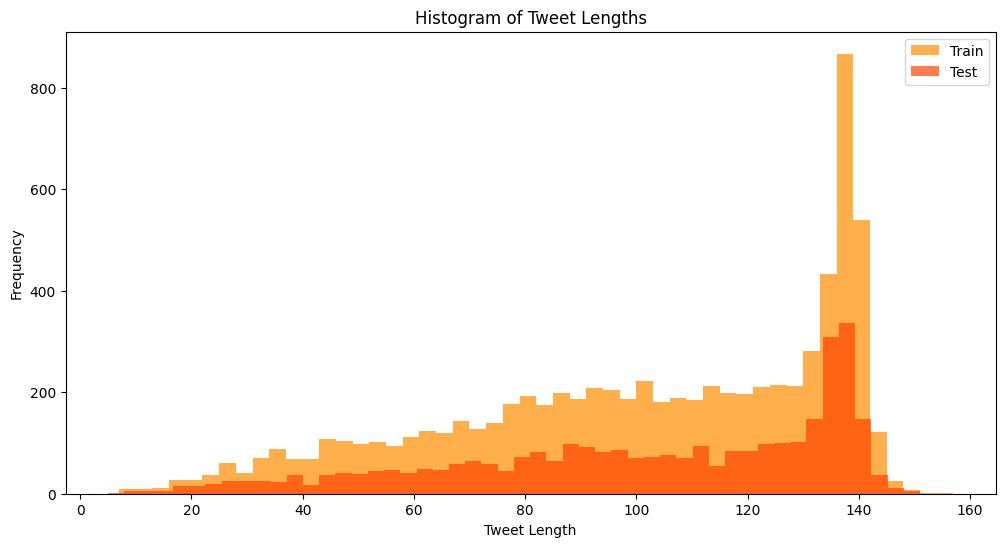

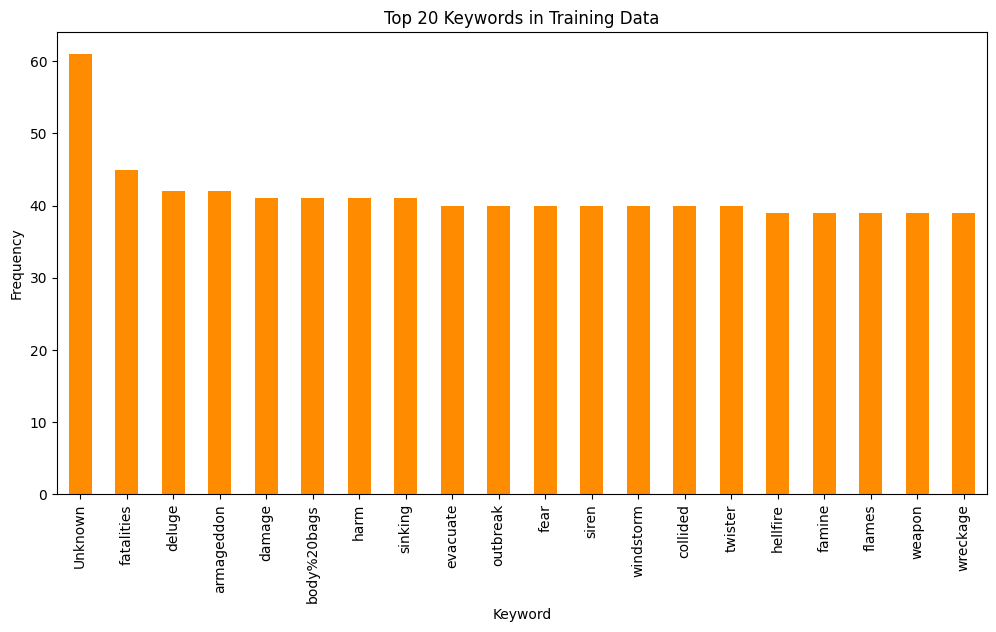

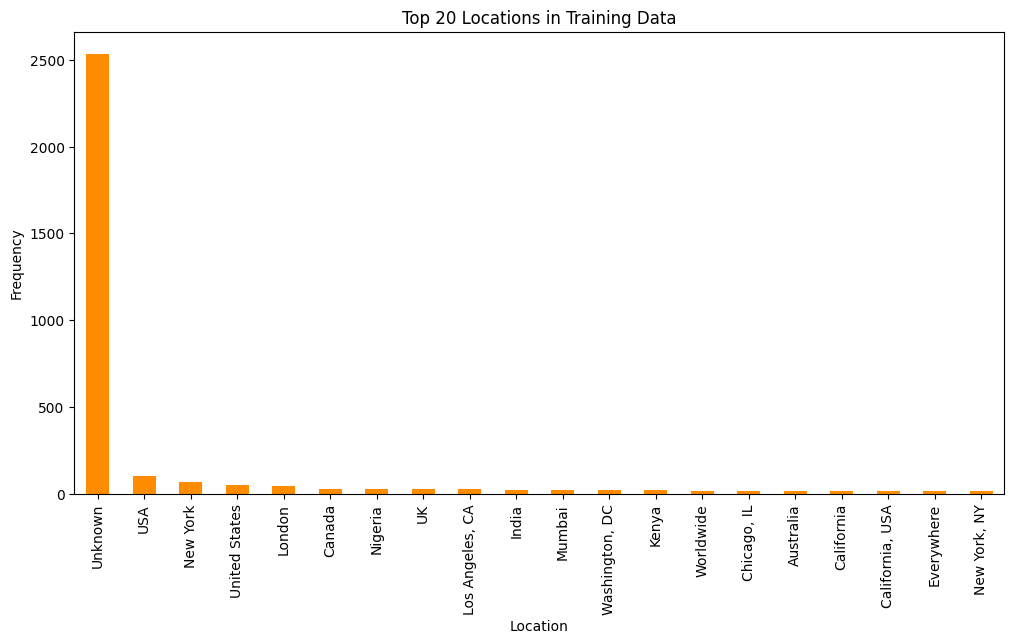

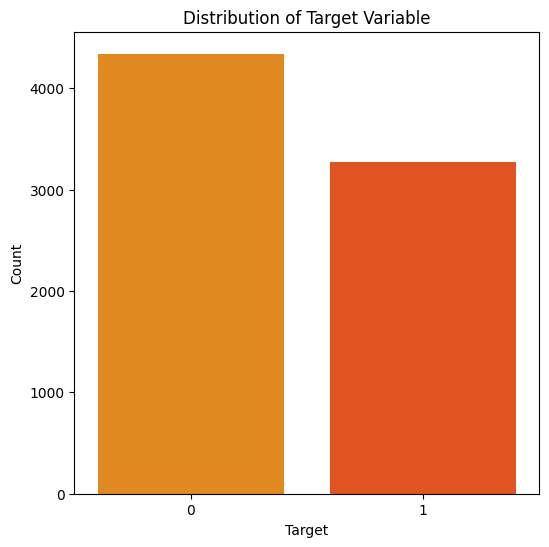

In [2]:
# Handle missing values using .loc to avoid chained assignment warnings
train_df.loc[:, 'keyword'] = train_df['keyword'].fillna('Unknown')
train_df.loc[:, 'location'] = train_df['location'].fillna('Unknown')
test_df.loc[:, 'keyword'] = test_df['keyword'].fillna('Unknown')
test_df.loc[:, 'location'] = test_df['location'].fillna('Unknown')

# Calculate tweet lengths
train_df['tweet_length'] = train_df['text'].str.len()
test_df['tweet_length'] = test_df['text'].str.len()

# Plot histograms of tweet lengths
plt.figure(figsize=(12, 6))
plt.hist(train_df['tweet_length'], bins=50, alpha=0.7, label='Train', color='#FF8C00')
plt.hist(test_df['tweet_length'], bins=50, alpha=0.7, label='Test', color='#FF4500')
plt.title('Histogram of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot the top 20 keywords in training data
plt.figure(figsize=(12, 6))
train_df['keyword'].value_counts().nlargest(20).plot(kind='bar', color='#FF8C00')
plt.title('Top 20 Keywords in Training Data')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.show()

# Plot the top 20 locations in training data
plt.figure(figsize=(12, 6))
train_df['location'].value_counts().nlargest(20).plot(kind='bar', color='#FF8C00')
plt.title('Top 20 Locations in Training Data')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of target variable
plt.figure(figsize=(6, 6))
sns.countplot(x='target', hue='target', data=train_df, palette=['#FF8C00', '#FF4500'], legend=False)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [3]:
# Check for missing values
missing_values_train = train_df.isnull().sum()
missing_values_test = test_df.isnull().sum()

# Handle missing values (fill missing keywords and locations with 'Unknown')
train_df.loc[:, 'keyword'] = train_df['keyword'].fillna('Unknown')
train_df.loc[:, 'location'] = train_df['location'].fillna('Unknown')
test_df.loc[:, 'keyword'] = test_df['keyword'].fillna('Unknown')
test_df.loc[:, 'location'] = test_df['location'].fillna('Unknown')

print(missing_values_train)
print(missing_values_test)

id              0
keyword         0
location        0
text            0
target          0
tweet_length    0
dtype: int64
id              0
keyword         0
location        0
text            0
tweet_length    0
dtype: int64


### 3.3 Data Cleaning

To ensure the effectiveness of our NLP model, particularly when using techniques like GloVe, it is crucial to clean the data thoroughly. The steps taken for data cleaning include:

1. **Combining Text and Keywords:**
   - Both the `text` and `keyword` fields are important. When `keyword` is present, it is combined with the `text` to provide more context.

2. **Removing Unwanted Elements:**
   - **Space Encoding:** Replaces encoded spaces (`%20`) with actual spaces to ensure tokens are correctly interpreted.
   - **HTTP Links:** Removes URLs to eliminate irrelevant information.
   - **HTML Tags:** Strips out any HTML tags to clean the text.
   - **Non-Alphabetic Characters:** Removes characters that are not letters or numbers. While non-alphabetic characters can sometimes be useful (e.g., smiley faces indicating non-disaster), they are generally removed to simplify the data.

3. **Commonly Used Words:**
   - Removing or handling common stopwords carefully as they might not contribute significantly to the disaster context.

Proper data cleaning is essential for achieving a high score in NLP tasks, as it ensures that the text is in a suitable format for the model to learn effectively from the data.

In [4]:
import re
import pandas as pd

# Load datasets
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

# Define patterns for cleaning text
SPACE_PATTERN = re.compile(r'%20')
URL_PATTERN = re.compile(r'https?://\S+|www\.\S+')
TAG_PATTERN = re.compile(r'<.*?>')
TOKEN_PATTERN = re.compile(r'[^A-Za-z0-9 ]+')

def concat_string_and_clean(x):
    """
    Concatenate the 'keyword', 'location', and 'text' columns of a DataFrame row into a single string.
    Clean the concatenated string by:
    - Converting to lowercase
    - Replacing '%20' with space
    - Removing URLs
    - Removing HTML tags
    - Removing non-alphanumeric characters (except spaces)
    
    Parameters:
    x (pd.Series): A row of the DataFrame
    
    Returns:
    str: The cleaned concatenated string
    """
    message = ""
    if isinstance(x["keyword"], str) and len(x["keyword"]) > 0:
        message += x["keyword"] + " "
    if isinstance(x["location"], str) and len(x["location"]) > 0:
        message += x["location"] + " "
    if isinstance(x["text"], str) and len(x["text"]) > 0:
        message += x["text"]

    # Clean the message
    message = message.lower()
    message = SPACE_PATTERN.sub(' ', message)
    message = URL_PATTERN.sub('', message)
    message = TAG_PATTERN.sub('', message)
    message = TOKEN_PATTERN.sub('', message)
    return message

# Apply the cleaning function to each row before dropping columns
train_df['clean_text'] = train_df.apply(concat_string_and_clean, axis=1)
test_df['clean_text'] = test_df.apply(concat_string_and_clean, axis=1)

# Drop the original 'keyword' and 'location' columns as they are now included in 'clean_text'
train_df.drop(columns=['keyword', 'location'], inplace=True)
test_df.drop(columns=['keyword', 'location'], inplace=True)

# Save the cleaned data to new CSV files
train_df.to_csv("data/train_v2.csv", index=None)
test_df.to_csv("data/test_v2.csv", index=None)

# Display the number of records that have been processed
train_modified_count = train_df['clean_text'].notna().sum()
test_modified_count = test_df['clean_text'].notna().sum()

print(f"Number of records modified in train dataset: {train_modified_count}")
print(f"Number of records modified in test dataset: {test_modified_count}")

# Display a sample of the cleaned data
print("Sample of cleaned train dataset:")
print(train_df[['id', 'clean_text', 'target']].head())

print("Sample of cleaned test dataset:")
print(test_df[['id', 'clean_text']].head())

Number of records modified in train dataset: 7613
Number of records modified in test dataset: 3263
Sample of cleaned train dataset:
   id                                         clean_text  target
0   1  our deeds are the reason of this earthquake ma...       1
1   4              forest fire near la ronge sask canada       1
2   5  all residents asked to shelter in place are be...       1
3   6  13000 people receive wildfires evacuation orde...       1
4   7  just got sent this photo from ruby alaska as s...       1
Sample of cleaned test dataset:
   id                                         clean_text
0   0                 just happened a terrible car crash
1   2  heard about earthquake is different cities sta...
2   3  there is a forest fire at spot pond geese are ...
3   9              apocalypse lighting spokane wildfires
4  11      typhoon soudelor kills 28 in china and taiwan


## 4. Model Architecture

### 4.1 Compare GloVe, TF-IDF, Word2Vec

| Feature | GloVe | TF-IDF | Word2Vec |
|---------|-------|--------|----------|
| **Type** | Pre-trained word embeddings | Term frequency-inverse document frequency | Pre-trained word embeddings |
| **Model** | Global Vectors for Word Representation | Statistical measure | Continuous Bag of Words (CBOW) or Skip-gram |
| **Captures Context** | Yes, considers global word co-occurrence | No, treats each word independently | Yes, considers local word context |
| **Dimensionality** | Fixed (e.g., 200D, 300D) | Varies based on vocabulary size | Fixed (e.g., 200D, 300D) |
| **Training** | Pre-trained on large corpus (e.g., Common Crawl) | No training, computed directly from corpus | Pre-trained on large corpus (e.g., Google News) |
| **Performance** | Good balance between global and local context | Simple and efficient for document classification | Good for capturing semantic meanings |
| **Usage** | Suitable for downstream tasks like text classification | Simple models, quick computation | Suitable for tasks requiring word context |

**Why we use GloVe:**
We chose GloVe for this project because it provides a good balance between capturing global and local contexts of words. Unlike TF-IDF, which treats words independently and can lead to sparse vectors, GloVe embeddings are dense and pre-trained on large corpora, ensuring better generalization. Compared to Word2Vec, GloVe focuses on the global co-occurrence matrix, which is beneficial for capturing semantic relationships in a more comprehensive way.

### 4.2 Compare GRU, LSTM, Bi-RNN

| Feature | GRU | LSTM | Bi-RNN |
|---------|-----|------|-------|
| **Type** | Gated Recurrent Unit | Long Short-Term Memory | Bidirectional Recurrent Neural Network |
| **Complexity** | Less complex, fewer parameters | More complex, more parameters | Depends on underlying RNN (e.g., GRU or LSTM) |
| **Speed** | Faster training, less computation | Slower training due to more gates | Slower due to processing in both directions |
| **Memory** | Lower memory usage | Higher memory usage | Higher memory usage due to bidirectional processing |
| **Performance** | Good for capturing dependencies over short to medium sequences | Good for long-range dependencies | Better contextual understanding by processing input in both directions |
| **Usage** | Suitable for most sequence tasks with efficiency | Suitable for tasks with long-term dependencies | Suitable for tasks needing context from both past and future states |

**Why we use GRU:**
We chose GRU for this project because it offers a good trade-off between complexity and performance. GRUs are less complex and faster to train compared to LSTMs, making them more efficient while still capable of capturing dependencies in sequences. While Bi-RNNs provide richer context by processing in both directions, the increased computational cost and memory usage make them less desirable for our needs. GRUs, therefore, provide an optimal balance for our text classification task.

### 4.3 Setup GloVe Trained Model

To download and set up the GloVe trained model for use in your NLP project, follow these steps:

1. **Visit the GloVe Project Page:**
   - Open your web browser and go to the [GloVe project page](https://nlp.stanford.edu/projects/glove/).

2. **Download the Pre-trained GloVe Model:**
   - On the GloVe project page, look for the section titled "Pre-trained word vectors".
   - Find the link to the Twitter dataset and click on it, or directly use this link: [glove.twitter.27B.zip](https://nlp.stanford.edu/data/glove.twitter.27B.zip).

3. **Unzip the Downloaded File:**
   - Once the file `glove.twitter.27B.zip` is downloaded, you need to unzip it.
   - On most operating systems, you can unzip the file by right-clicking on it and selecting "Extract All" or a similar option.

   Alternatively, you can use the command line:

   ```sh
   unzip glove.twitter.27B.zip
   ```

4. **Locate the Required File:**
   - After unzipping, you will find several files corresponding to different embedding dimensions.
   - For this project, you need the file with 200-dimensional embeddings: `glove.twitter.27B.200d.txt`.

5. **Move the File to the Correct Directory:**
   - Create a directory named `glove` in your project folder if it doesn't already exist.

   ```sh
   mkdir -p glove
   ```

   - Move the `glove.twitter.27B.200d.txt` file into the `glove` directory.

   ```sh
   mv glove.twitter.27B.200d.txt glove/
   ```

6. **Ensure the File is in the Correct Path:**
   - The final path to the GloVe embeddings file should be `glove/glove.twitter.27B.200d.txt`.

By following these steps, you will have the GloVe trained model ready in your project directory, allowing your code to load and utilize the embeddings for your NLP tasks.

### 4.4 Loading and Embedding Text Data (GloVe)

This block of code sets up the data processing pipeline for a Natural Language Processing (NLP) task, specifically using GloVe embeddings to convert text data into numerical vectors for a neural network model.

1. **Constants and Utility Functions:**
   - **COMMON_STOP_WORDS:** A set of common stop words to ignore during text processing.
   - **`load_glove_vectors(dimension, verbose=False)`:** Loads GloVe embeddings from a file and returns a dictionary mapping words to their embedding vectors.
   - **`embed_text_with_glove(words, glove_embedding)`:** Converts a string of words into their corresponding GloVe embedding vectors, excluding stop words.

2. **Dataset Classes:**
   - **`DisasterTweetsDataset`:** A custom dataset class for loading and processing training text data with GloVe embeddings. It:
     - Loads the data from a specified path.
     - Embeds text data using GloVe vectors.
     - Pads or truncates sequences to a fixed length.
     - Stores sequences and corresponding labels.
   - **`DisasterTweetsTestDataset`:** A similar custom dataset class for loading and processing test text data with GloVe embeddings. It:
     - Loads the data from a specified path.
     - Embeds text data using GloVe vectors.
     - Pads or truncates sequences to a fixed length.
     - Stores only sequences (as test data typically does not have labels).


In [5]:
# Define constants
COMMON_STOP_WORDS = set(['the', 'a', 'in', 'to', 'of', 'i', 'and', 'is', 'you', 'for', 'on', 'it', 'my', 'that',
                         'with', 'are', 'at', 'by', 'this', 'have', 'from', 'be', 'was', 'do', 'will', 'as', 'up',
                         'me', 'am', 'so', 'we', 'your', 'has', 'when', 'an', 's', 'they', 'about', 'been', 'there',
                         'who', 'would', 'into', 'his', 'them', 'did', 'w', 'their', 'm', 'its', 'does', 'where', 'th',
                         'b', 'd', 'x', 'p', 'o', 'r', 'c', 'n', 'e', 'g', 'v', 'k', 'l', 'f', 'j', 'z', 'us', 'our',
                         'all', 'can', 'may'])

def load_glove_vectors(dimension, verbose=False):
    """
    Load GloVe embeddings from a file and return a dictionary of word to embedding vectors.

    Parameters:
    - dimension (int): The dimension of the GloVe embeddings.
    - verbose (bool): If True, print the number of embeddings found.

    Returns:
    - dict: A dictionary where keys are words and values are embedding vectors.
    """
    path_to_glove_file = f"glove/glove.twitter.27B.{dimension}d.txt"
    embeddings_index = {}
    with open(path_to_glove_file) as f:
        for line in f:
            word, coefs = line.split(maxsplit=1)
            coefs = np.fromstring(coefs, "f", sep=" ")
            embeddings_index[word] = coefs
    if '<PAD>' not in embeddings_index:
        embeddings_index['<PAD>'] = np.zeros(dimension)
    if verbose:
        print(f"Found {len(embeddings_index)} word vectors.")
    return embeddings_index

def embed_text_with_glove(words, glove_embedding):
    """
    Convert a string of words into their corresponding GloVe embedding vectors.

    Parameters:
    - words (str): The string of words to embed.
    - glove_embedding (dict): A dictionary of GloVe embeddings.

    Returns:
    - np.array: An array of embedding vectors.
    """
    words_list = [w for w in words.split() if w not in COMMON_STOP_WORDS]
    word_encoding = []
    for word in words_list:
        if word in glove_embedding:
            word_encoding.append(glove_embedding[word])

    if len(word_encoding) == 0:
        return None
    else:
        return np.array(word_encoding)

class DisasterTweetsDataset(Dataset):
    """
    Custom dataset for loading and processing text data with GloVe embeddings.

    Attributes:
    - max_seq_len (int): Maximum sequence length for padding/truncation.
    - glove_embedding (dict): GloVe embeddings.
    - sequences (list): List of padded/truncated sequences.
    - labels (list): List of labels.
    """
    def __init__(self, path, max_seq_len):
        self.max_seq_len = max_seq_len
        df = pd.read_csv(path)
        self.glove_embedding = load_glove_vectors(dimension=EMBEDDING_DIMENSION, verbose=True)
        df.loc[:, "text"] = df["text"].apply(lambda x: embed_text_with_glove(x, self.glove_embedding))
        df.dropna(inplace=True)

        # Truncate/pad sequences to max_seq_len
        sequences = [x[:max_seq_len] for x in df.text.tolist()]
        self.sequences = [self.padding_fun(x) for x in sequences]
        self.labels = df.target.tolist()

    def padding_fun(self, x):
        """
        Pad or truncate a sequence to the maximum sequence length.

        Parameters:
        - x (np.array): The sequence to pad/truncate.

        Returns:
        - np.array: The padded/truncated sequence.
        """
        if x.shape[0] >= self.max_seq_len:
            return x
        padding = np.array((self.max_seq_len - x.shape[0]) * [self.glove_embedding['<PAD>']])
        return np.concatenate((x, padding), axis=0)

    def __getitem__(self, i):
        return self.sequences[i], self.labels[i]

    def __len__(self):
        return len(self.sequences)

class DisasterTweetsTestDataset(Dataset):
    """
    Custom dataset for loading and processing test data with GloVe embeddings.

    Attributes:
    - max_seq_len (int): Maximum sequence length for padding/truncation.
    - glove_embedding (dict): GloVe embeddings.
    - sequences (list): List of padded/truncated sequences.
    """
    def __init__(self, path, max_seq_len, glove_embedding):
        self.glove_embedding = glove_embedding
        self.max_seq_len = max_seq_len
        df = pd.read_csv(path)

        df.loc[:, "text"] = df["text"].apply(lambda x: embed_text_with_glove(x, self.glove_embedding))
        df.dropna(inplace=True)

        # Truncate/pad sequences to max_seq_len
        sequences = [x[:max_seq_len] for x in df.text.tolist()]
        self.sequences = [self.padding_fun(x) for x in sequences]

    def padding_fun(self, x):
        """
        Pad or truncate a sequence to the maximum sequence length.

        Parameters:
        - x (np.array): The sequence to pad/truncate.

        Returns:
        - np.array: The padded/truncated sequence.
        """
        if x.shape[0] >= self.max_seq_len:
            return x
        padding = np.array((self.max_seq_len - x.shape[0]) * [self.glove_embedding['<PAD>']])
        return np.concatenate((x, padding), axis=0)

    def __getitem__(self, i):
        return self.sequences[i]

    def __len__(self):
        return len(self.sequences)

### 4.5 GRU-based Tweet Classifier

This block of code defines a neural network model and a wrapper class for training, evaluating, and predicting disaster tweets using GloVe embeddings and GRU layers.

1. **Constants and Imports:**
   - **EMBEDDING_DIMENSION:** Sets the dimension of GloVe embeddings.
   - Imports necessary PyTorch libraries for neural network implementation and optimization.

2. **DisasterTweetClassifier Class:**
   - A neural network model using GloVe embeddings and GRU for text classification.
   - **Methods:**
     - `__init__`: Initializes the model's layers and parameters.
     - `init_hidden`: Initializes the GRU's hidden state.
     - `forward`: Processes inputs through the GRU and fully connected layers to produce the output.

3. **DisasterTweetModel Class:**
   - A wrapper class for training, evaluating, and predicting with the `DisasterTweetClassifier`.
   - **Methods:**
     - `__init__`: Initializes the model, optimizer, loss function, and learning rate scheduler.
     - `fit`: Trains the model and optionally evaluates it on validation data.
     - `validate_accuracy`: Evaluates the model's accuracy on validation data.
     - `predict`: Predicts target labels for test data.

### Key Points:
- The `DisasterTweetClassifier` processes text data with GRU layers and fully connected layers for classification.
- The `DisasterTweetModel` manages training, validation, and prediction, ensuring all tensors are on the correct device (CPU or GPU).

In [17]:
# Define constants
EMBEDDING_DIMENSION = 200

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torch.optim import lr_scheduler
from torch.autograd import Variable

class DisasterTweetClassifier(nn.Module):
    """
    A neural network model for text classification using GloVe embeddings and GRU.
    This model includes dropout and normalization layers for regularization to prevent overfitting.

    Attributes:
    - batch_size (int): The batch size used in training.
    - hidden_size (int): The number of features in the hidden state of the GRU.
    - n_layers (int): The number of recurrent layers in the GRU.
    - hidden1 (int): The number of neurons in the first fully connected layer.
    - hidden2 (int): The number of neurons in the second fully connected layer.
    - dropout_prob (float): The probability of an element to be zeroed in dropout layers.
    - use_norm (bool): Whether to use normalization layers.
    - device (str): The device to run the model on (CPU or GPU).
    """
    
    def __init__(self, gru_params, batch_size, dropout_prob, use_norm, device):
        """
        Initialize the DisasterTweetClassifier model.

        Parameters:
        - gru_params (dict): Dictionary containing parameters for the GRU layer.
        - batch_size (int): The batch size used in training.
        - dropout_prob (float): The probability of an element to be zeroed in dropout layers.
        - use_norm (bool): Whether to use normalization layers.
        - device (str): The device to run the model on (CPU or GPU).
        """
        super(DisasterTweetClassifier, self).__init__()
        self.batch_size = batch_size
        self.hidden1 = 128
        self.hidden2 = 64
        self.device = device
        self.dropout_prob = dropout_prob
        self.use_norm = use_norm

        # Extract n_layers and hidden_size from gru_params
        self.n_layers = gru_params['num_layers']
        self.hidden_size = gru_params['hidden_size']

        # GRU layer to process embedding vectors
        self.rnn = nn.GRU(**gru_params)
        
        # Dropout layer
        self.dropout = nn.Dropout(p=self.dropout_prob)
        
        # Fully connected layers
        self.fc1 = nn.Linear(gru_params['hidden_size'], self.hidden1)
        self.fc2 = nn.Linear(self.hidden1, self.hidden2)
        self.fc3 = nn.Linear(self.hidden2, 1)

        # Normalization layers
        if self.use_norm:
            self.norm1 = nn.BatchNorm1d(self.hidden1)
            self.norm2 = nn.BatchNorm1d(self.hidden2)
        else:
            self.norm1 = nn.Identity()
            self.norm2 = nn.Identity()

    def init_hidden(self, batch_size):
        """
        Initialize hidden state for GRU.

        Parameters:
        - batch_size (int): The batch size used in training.

        Returns:
        - torch.Tensor: The initialized hidden state.
        """
        return torch.randn(self.n_layers, batch_size, self.hidden_size).to(self.device)

    def forward(self, inputs):
        """
        Forward pass through the network.

        Parameters:
        - inputs (torch.Tensor): The input tensor.

        Returns:
        - torch.Tensor: The output tensor.
        """
        # Adjust batch size if necessary
        batch_size = inputs.size(0)

        output, _ = self.rnn(inputs, self.init_hidden(batch_size))
        x = output[:, -1, :].squeeze()

        x = F.relu(self.fc1(x))
        x = self.norm1(x)
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.norm2(x)
        x = self.dropout(x)
        return self.fc3(x)

class DisasterTweetModel:
    """
    A wrapper class to handle the training and evaluation of the DisasterTweetClassifier model.

    Attributes:
    - lr (float): Learning rate.
    - epochs (int): Number of training epochs.
    - device (str): The device to run the model on (CPU or GPU).
    - model (DisasterTweetClassifier): The DisasterTweetClassifier model instance.
    - optimizer (torch.optim.Optimizer): Optimizer for training.
    - criterion (torch.nn.Module): Loss function.
    - verbose (bool): If True, print detailed logs during training.
    - shrink_lr (bool): If True, apply learning rate scheduler.
    - exp_lr_scheduler (torch.optim.lr_scheduler): Learning rate scheduler.
    """

    def __init__(self, gru_params, lr=0.001, epochs=1, batch_size=1, shrink_lr=True, dropout_prob=0.5, use_norm=False, verbose=False, device='cpu'):
        self.lr = lr
        self.epochs = epochs
        self.device = device
        # Initialize the DisasterTweetClassifier model with dropout probability
        self.model = DisasterTweetClassifier(gru_params=gru_params, batch_size=batch_size, dropout_prob=dropout_prob, 
                                             use_norm=use_norm, device=device).to(device)
        # Use Adam optimizer with specified learning rate
        self.optimizer = optim.Adam([p for p in self.model.parameters() if p.requires_grad], lr=lr)
        # Binary Cross-Entropy with Logits Loss
        self.criterion = nn.BCEWithLogitsLoss()
        self.verbose = verbose
        self.shrink_lr = shrink_lr
        # Learning rate scheduler
        self.exp_lr_scheduler = lr_scheduler.StepLR(self.optimizer, step_size=2, gamma=0.5)
        if self.verbose:
            print(self.model)

    def fit(self, data_loader, evaluator_loader=None):
        """
        Train the model with the provided data.

        Parameters:
        - data_loader (DataLoader): DataLoader for training data.
        - evaluator_loader (DataLoader): DataLoader for evaluation data (optional).

        Returns:
        - dict: A dictionary with lists of epoch losses and accuracies.
        """
        training_losses = []
        validation_losses = []
        training_accuracies = []
        validation_accuracies = []

        for epoch in range(self.epochs):
            self.model.train()
            epoch_train_loss = 0
            correct_train = 0

            for batch_idx, (data, target) in enumerate(data_loader):
                data, target = data.to(self.device), target.to(self.device)

                self.optimizer.zero_grad()
                output = self.model(data)

                loss = self.criterion(output.squeeze(), target.float())
                loss.backward()

                nn.utils.clip_grad_norm_(self.model.parameters(), 1)
                self.optimizer.step()

                epoch_train_loss += loss.item()

                # Calculate training accuracy
                preds = (output.squeeze() > 0).type_as(target)
                correct_train += preds.eq(target).sum().item()

            training_losses.append(epoch_train_loss / len(data_loader))
            training_accuracies.append(correct_train / len(data_loader.dataset))

            if evaluator_loader:
                self.model.eval()
                epoch_val_loss = 0
                correct_val = 0
                with torch.no_grad():
                    for data, target in evaluator_loader:
                        data, target = data.to(self.device), target.to(self.device)
                        output = self.model(data)
                        loss = self.criterion(output.squeeze(), target.float())
                        epoch_val_loss += loss.item()

                        # Calculate validation accuracy
                        preds = (output.squeeze() > 0).type_as(target)
                        correct_val += preds.eq(target).sum().item()

                validation_losses.append(epoch_val_loss / len(evaluator_loader))
                validation_accuracies.append(correct_val / len(evaluator_loader.dataset))
                
                print({"epoch": epoch, 
                       "train_loss": epoch_train_loss / len(data_loader), 
                       "val_loss": epoch_val_loss / len(evaluator_loader), 
                       "train_accuracy": correct_train / len(data_loader.dataset), 
                       "val_accuracy": correct_val / len(evaluator_loader.dataset)})

            if self.shrink_lr:
                self.exp_lr_scheduler.step()

        return {
            "training_losses": training_losses,
            "validation_losses": validation_losses,
            "training_accuracies": training_accuracies,
            "validation_accuracies": validation_accuracies
        }

    def validate_accuracy(self, data_loader):
        """
        Validate the model accuracy with the provided data.

        Parameters:
        - data_loader (DataLoader): DataLoader for validation data.

        Returns:
        - float: The accuracy of the model on the validation data.
        """
        self.model.eval()
        correct = 0
        with torch.no_grad():
            for data, target in data_loader:
                data, target = Variable(data), Variable(target)
                if torch.cuda.is_available():
                    data = data.cuda()
                    target = target.cuda()
                output = self.model(data) > 0
                output = output.squeeze().type_as(target)
                correct += output.eq(target).cpu().sum()

        if self.verbose:
            print({
                "Total": len(data_loader.dataset),
                "Correct": correct,
                "Accuracy": 1.00 * correct / len(data_loader.dataset)
            })
        return 1.00 * correct / len(data_loader.dataset)

    def predict(self, data_loader):
        """
        Predict the target for the provided data.

        Parameters:
        - data_loader (DataLoader): DataLoader for test data.

        Returns:
        - np.array: The predicted targets.
        """
        self.model.eval()
        test_pred = torch.LongTensor().to(self.device)  # Initialize on the same device

        with torch.no_grad():
            for i, data in enumerate(data_loader):
                data = Variable(data).to(self.device)
                output = self.model(data) > 0
                output = output.squeeze()
                test_pred = torch.cat((test_pred, output), dim=0)
        return test_pred.cpu().numpy()  # Move to CPU before converting to numpy array

### 4.6 GRU Model Training Workflow

This block of code handles the data loading, model training, evaluation, and prediction process for a disaster tweet classification task using GloVe embeddings and a GRU-based neural network model. It includes steps for initializing datasets, setting up DataLoaders, configuring the device (CPU/GPU), training the model, predicting on the test dataset, and saving the predictions to a CSV file.

#### Key Steps:
1. **Data Loading:**
   - Paths to training, test, and submission data files are defined.
   - Datasets are initialized and split into training and evaluation sets.

2. **Data Preparation:**
   - Custom collate functions are defined for batching the data.
   - DataLoaders are created for training and evaluation datasets.

3. **Model Training:**
   - The device is set to GPU if available, otherwise CPU.
   - The `DisasterTweetModel` is instantiated and trained using the training data.

4. **Prediction:**
   - The test dataset is prepared and predictions are made using the trained model.
   - Lengths of the test dataset and predictions are checked and adjusted if necessary.
   - Predictions are saved to a CSV file.

Found 1193515 word vectors.
Training with dropout rate: 0.0
DisasterTweetClassifier(
  (rnn): GRU(200, 128, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.0, inplace=False)
  (fc1): Linear(in_features=128, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
  (norm1): Identity()
  (norm2): Identity()
)
{'epoch': 0, 'train_loss': 0.68435178083532, 'val_loss': 0.6799082078716971, 'train_accuracy': 0.5710059171597633, 'val_accuracy': 0.5754437869822485}
{'epoch': 1, 'train_loss': 0.5727926240247838, 'val_loss': 0.5391880084167827, 'train_accuracy': 0.7067307692307693, 'val_accuracy': 0.7418639053254438}
{'epoch': 2, 'train_loss': 0.5155272610047285, 'val_loss': 0.5633939504623413, 'train_accuracy': 0.7575813609467456, 'val_accuracy': 0.7403846153846154}
{'epoch': 3, 'train_loss': 0.5013340259299559, 'val_loss': 0.5473226376555183, 'train_accuracy': 0.7653476331360947, 'val_accuracy':

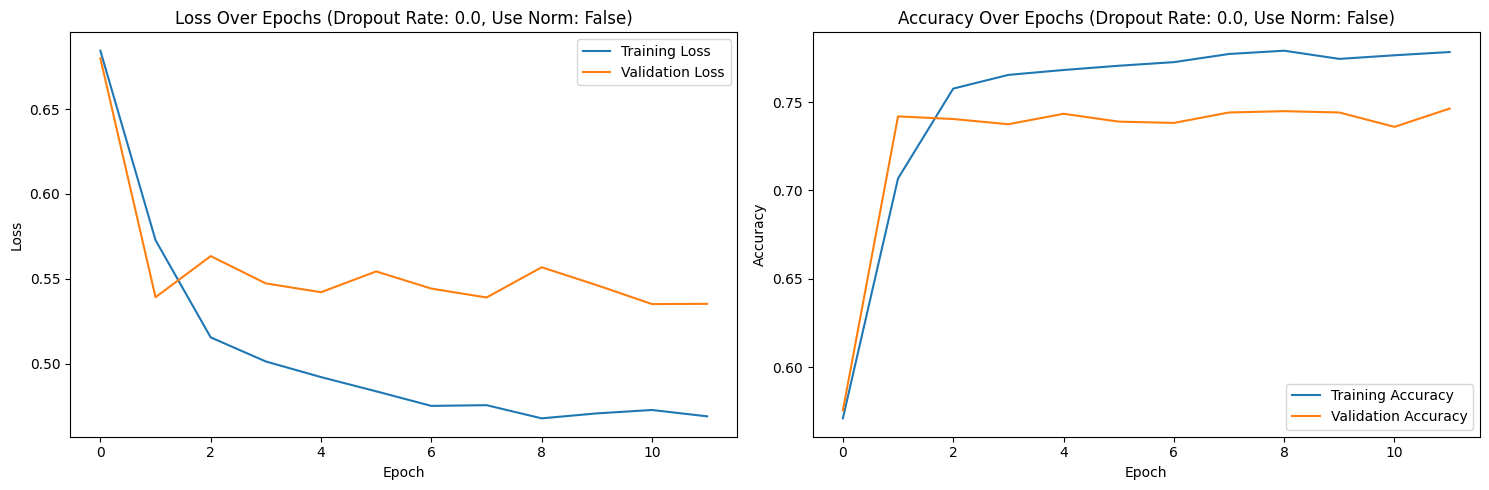

Training with dropout rate: 0.5
DisasterTweetClassifier(
  (rnn): GRU(200, 128, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=128, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
  (norm1): Identity()
  (norm2): Identity()
)
{'epoch': 0, 'train_loss': 0.6857402556082781, 'val_loss': 0.6801465966484763, 'train_accuracy': 0.5654585798816568, 'val_accuracy': 0.5754437869822485}
{'epoch': 1, 'train_loss': 0.6137776160941405, 'val_loss': 0.5438545373353091, 'train_accuracy': 0.6749260355029586, 'val_accuracy': 0.7440828402366864}
{'epoch': 2, 'train_loss': 0.5402301595491521, 'val_loss': 0.543705861676823, 'train_accuracy': 0.7518491124260355, 'val_accuracy': 0.7433431952662722}
{'epoch': 3, 'train_loss': 0.5248564492253697, 'val_loss': 0.5458532449874011, 'train_accuracy': 0.7596153846153846, 'val_accuracy': 0.7403846153846154}
{'epoc

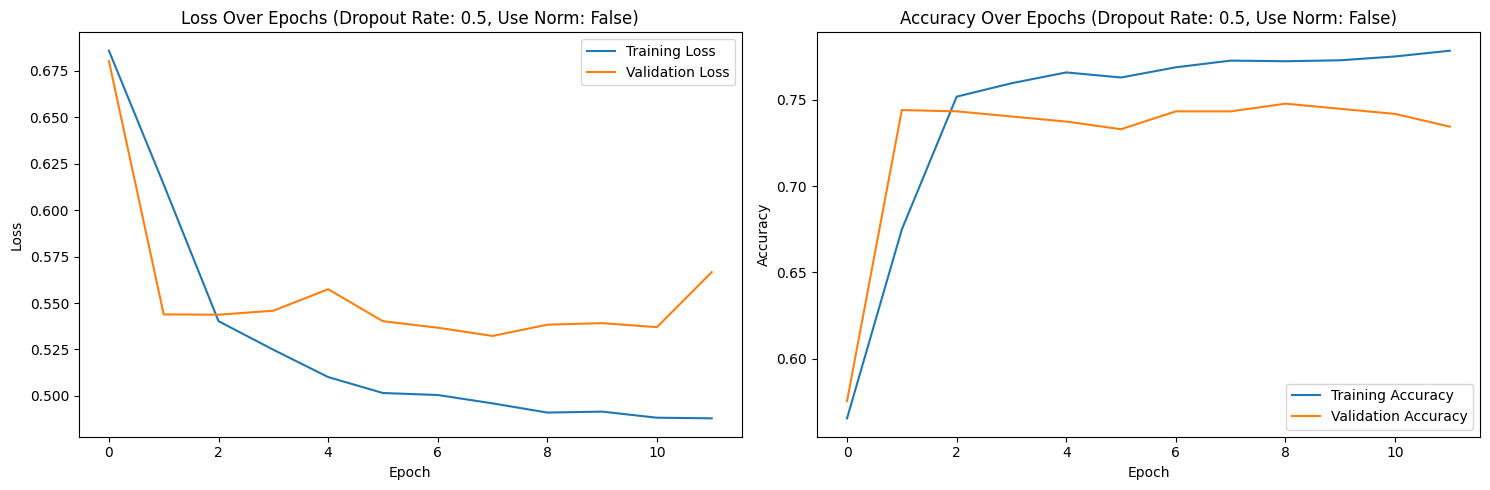

Training with dropout rate: 0.0
DisasterTweetClassifier(
  (rnn): GRU(200, 128, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.0, inplace=False)
  (fc1): Linear(in_features=128, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
  (norm1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (norm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
{'epoch': 0, 'train_loss': 0.6012480199337006, 'val_loss': 0.6719600043513558, 'train_accuracy': 0.6706730769230769, 'val_accuracy': 0.6205621301775148}
{'epoch': 1, 'train_loss': 0.5192162440103643, 'val_loss': 0.5405993868004192, 'train_accuracy': 0.7518491124260355, 'val_accuracy': 0.7292899408284024}
{'epoch': 2, 'train_loss': 0.5012679485713735, 'val_loss': 0.5670072178949009, 'train_accuracy': 0.7572115384615384, 'val_accuracy': 0.7226331360946746}
{'epoch': 3, 'train

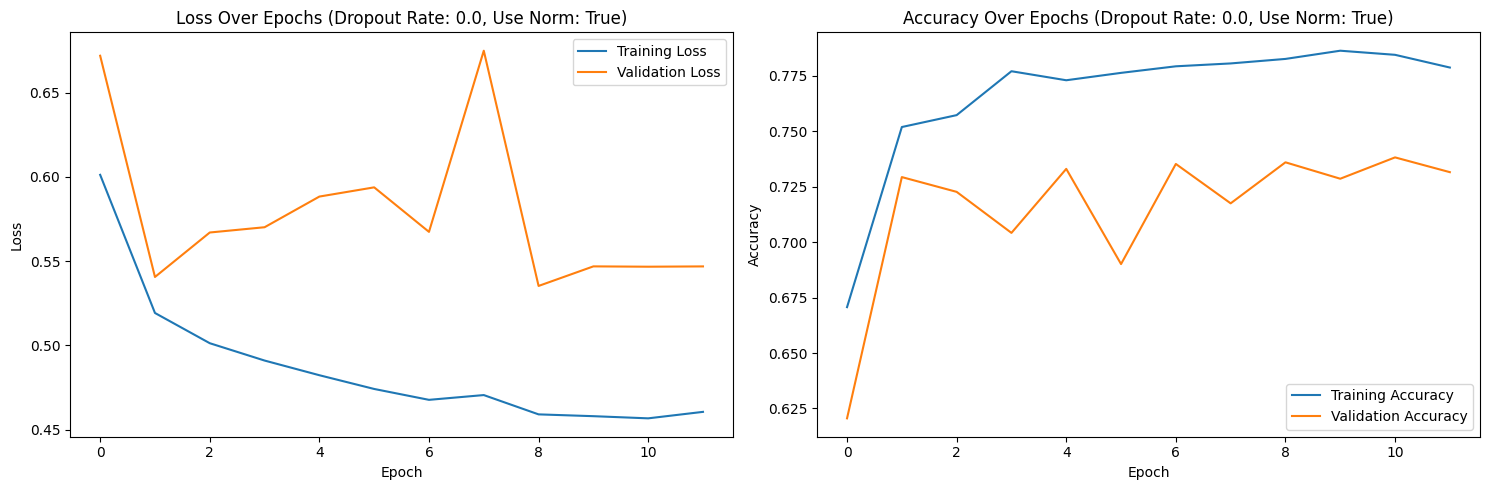

Training with dropout rate: 0.5
DisasterTweetClassifier(
  (rnn): GRU(200, 128, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=128, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
  (norm1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (norm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
{'epoch': 0, 'train_loss': 0.6344339128802804, 'val_loss': 0.6124597801403566, 'train_accuracy': 0.6568047337278107, 'val_accuracy': 0.7204142011834319}
{'epoch': 1, 'train_loss': 0.5369072198867798, 'val_loss': 0.6113168529488824, 'train_accuracy': 0.7433431952662722, 'val_accuracy': 0.7211538461538461}
{'epoch': 2, 'train_loss': 0.5128415531971875, 'val_loss': 0.5582273548299616, 'train_accuracy': 0.7592455621301775, 'val_accuracy': 0.738905325443787}
{'epoch': 3, 'train_

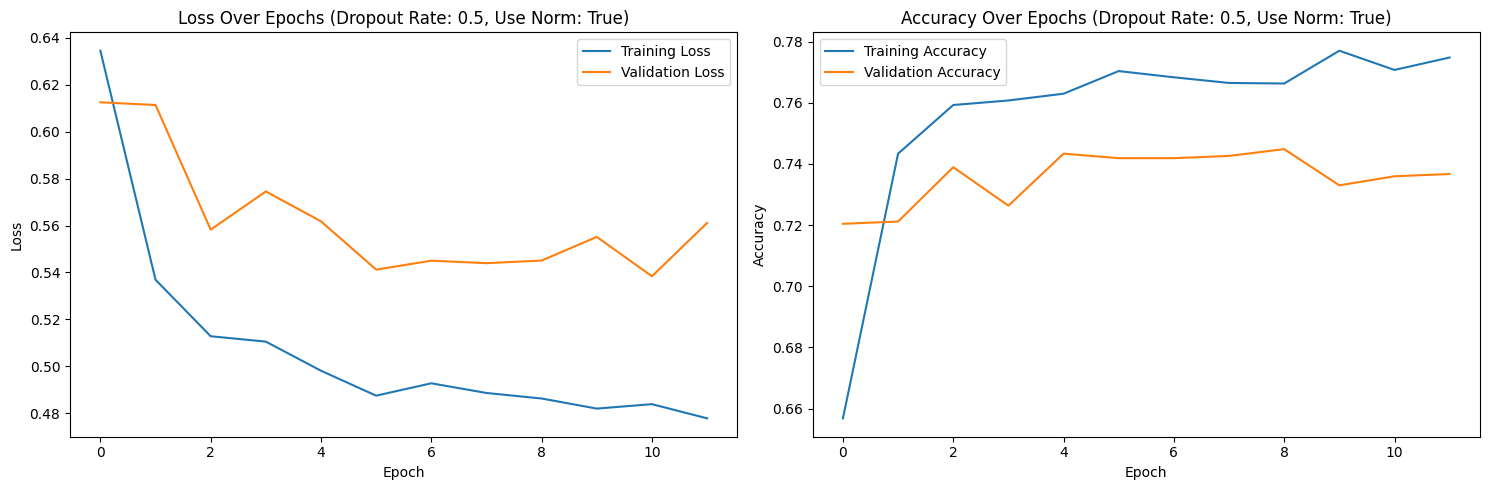

In [18]:
def collate_train_batch(batch):
    """
    Custom collate function to convert a batch of data into tensors.
    
    Parameters:
    - batch (list): List of tuples (input_sequence, target).
    
    Returns:
    - inputs (torch.FloatTensor): Batched input sequences.
    - target (torch.FloatTensor): Batched targets.
    """
    inputs = torch.FloatTensor([item[0] for item in batch])
    target = torch.FloatTensor([item[1] for item in batch])
    return inputs, target

def collate_test_batch(batch):
    """
    Custom collate function for test data to convert a batch of data into tensors.
    
    Parameters:
    - batch (list): List of input sequences.
    
    Returns:
    - inputs (torch.FloatTensor): Batched input sequences.
    """
    inputs = torch.FloatTensor([item for item in batch])
    return inputs

def plot_metrics(metrics, title_suffix=''):
    """
    Plot training and validation losses and accuracies.

    Parameters:
    - metrics (dict): A dictionary containing 'training_losses', 'validation_losses', 
                      'training_accuracies', and 'validation_accuracies'.
    - title_suffix (str): A suffix to add to the titles of the plots.
    """
    # Create a figure with two subplots: one for losses and one for accuracies
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot training and validation losses on the left subplot
    ax1.plot(metrics['training_losses'], label='Training Loss')
    ax1.plot(metrics['validation_losses'], label='Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title(f'Loss Over Epochs {title_suffix}')
    ax1.legend()

    # Plot training and validation accuracies on the right subplot
    ax2.plot(metrics['training_accuracies'], label='Training Accuracy')
    ax2.plot(metrics['validation_accuracies'], label='Validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.set_title(f'Accuracy Over Epochs {title_suffix}')
    ax2.legend()

    # Show the combined plot
    plt.tight_layout()
    plt.show()

def train_and_plot(dropout_rates, use_norm):
    """
    Train the model with different dropout rates and plot the metrics.

    Parameters:
    - dropout_rates (list): List of dropout rates to use for training.
    """
    for dropout_prob in dropout_rates:
        print(f'Training with dropout rate: {dropout_prob}')
        
        # Instantiate the DisasterTweetModel model with the appropriate device and dropout rate
        model = DisasterTweetModel(gru_params=gru_params, epochs=epochs, batch_size=batch_size, dropout_prob=dropout_prob, 
                                   use_norm=use_norm, verbose=True, device=device)

        # Train the model and capture loss and accuracy values
        metrics = model.fit(train_loader, test_loader)

        # Plot the metrics
        plot_metrics(metrics, title_suffix=f'(Dropout Rate: {dropout_prob}, Use Norm: {use_norm})')

# Define GRU parameters
gru_params = {
    'input_size': EMBEDDING_DIMENSION,
    'hidden_size': 128,
    'num_layers': 2,
    'batch_first': True
}

# Define paths to data files
TRAIN_DATA_PATH = "data/train_v2.csv"
TEST_DATA_PATH = "data/test_v2.csv"
SUB_DATA_PATH = "data/sample_submission.csv"
PRED_DATA_PATH = "data/sample_submission_glove_gru_v6.csv"

# Initialize the dataset with maximum sequence length
dataset = DisasterTweetsDataset(TRAIN_DATA_PATH, max_seq_len=30)
train_size = int(0.8 * len(dataset))
evaluator_size = len(dataset) - train_size

# Define hyperparameters
epochs = 12
batch_size = 64
max_seq_len = 30

# Split the dataset into training and evaluation sets
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, evaluator_size], generator=torch.Generator().manual_seed(42))

# DataLoader for training and evaluation
train_loader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=collate_train_batch, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, collate_fn=collate_train_batch, shuffle=True)

# Set the device to GPU if available, otherwise CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Train and plot with different dropout rates
dropout_rates = [0.0, 0.5]
train_and_plot(dropout_rates, False)
train_and_plot(dropout_rates, True)

### 4.7 Loss and Accuracy Over Epochs

The two charts provided represent the progression of "Loss Over Epochs" and "Accuracy Over Epochs" during the training of a machine learning model, likely a neural network. Here's how to interpret and utilize these charts:

#### Loss Over Epochs

1. **Interpretation:**
   - The blue line represents the training loss, which is the error measure of the model on the training dataset across each epoch.
   - The orange line shows the validation loss, which is the measure of error on a separate validation set that the model hasn't learned from directly.
   - A descending line indicates improvement in model performance, as the model is minimizing the loss function.

2. **Usage:**
   - **Detecting Overfitting:** If the training loss continues to decrease while the validation loss begins to increase or plateaus, it can be a sign of overfitting. This means the model is learning to memorize the training data rather than generalizing from it.
   - **Model Tuning:** Adjust hyperparameters like learning rate, batch size, or model architecture based on the trends observed. For instance, adding dropout layers or increasing regularization might help if the model is overfitting.
   - **Early Stopping:** You might decide to stop training early if the validation loss does not improve for several epochs, which saves computational resources and prevents overfitting.

#### Accuracy Over Epochs

1. **Interpretation:**
   - The blue line represents the training accuracy, showing how well the model predicts the training data.
   - The orange line indicates validation accuracy, which shows how well the model predicts new, unseen data.
   - An ascending line indicates that the model is successfully learning to classify the data correctly.

2. **Usage:**
   - **Evaluating Model Performance:** Higher accuracy on the validation set indicates better generalization. If the validation accuracy plateaus or decreases, it might suggest the model has reached its learning capacity with the given architecture or data.
   - **Model Comparisons:** Use the accuracy trends to compare different models or configurations. The model with higher validation accuracy is generally better at generalizing.
   - **Balance between Bias and Variance:** If training accuracy is very high but validation accuracy is much lower, the model may have high variance (overfitting). If both accuracies are low, the model may have high bias (underfitting) and might benefit from a more complex model architecture or more features.

#### General Guidelines

- **Monitoring:** Regularly monitor both loss and accuracy during training. They provide valuable insights into how well the model is learning and generalizing.
- **Iteration:** Based on observations from these charts, iterate on model design and training approach, tweaking layers, neuron counts, and learning parameters until the desired performance is achieved.
- **Documentation:** Keep track of changes and results in each iteration to systematically find the best model configuration.

## 5. Results and Analysis

To evaluate the performance of different model architectures and hyperparameter settings, we conducted a series of experiments. The experiments aimed to determine the impact of dropout rates and normalization layers on the validation accuracy of our DisasterTweetClassifier model. We tested four different configurations as outlined below:

### 5.1 Experiment Configurations

![](img/model_acc_comp.png)

This table summarizes the results of four different models trained with various configurations. Each model is evaluated based on its dropout rate, the use of normalization, and its validation accuracy.

| Model | Dropout Rate | Use Normalization | Validation Accuracy |
|-------|--------------|-------------------|---------------------|
| A     | 0.0          | No                | 0.7463              |
| B     | 0.5          | No                | 0.7419              |
| C     | 0.0          | Yes               | 0.7382              |
| D     | 0.5          | Yes               | 0.7367              |

**Hyperparameters**:
- Learning Rate: 0.001
- Epochs: 12
- Batch Size: 64

### 5.2 Analysis

1. **Impact of Dropout:**
   - Comparing Model A (0.0 dropout) and Model B (0.5 dropout), we observe a slight decrease in validation accuracy with the addition of dropout. This suggests that, for this dataset and model, dropout does not significantly help to improve generalization. However, it may still help to prevent overfitting in some cases.

2. **Impact of Normalization:**
   - Comparing Model A (no normalization) and Model C (with normalization), we observe a slight decrease in validation accuracy when normalization layers are added. This indicates that normalization may not provide a substantial benefit in this particular setup, and may even slightly hinder performance.

3. **Combined Effects:**
   - Comparing Models A, B, C, and D, we see that the highest validation accuracy is achieved by Model A, which does not use dropout or normalization. The combination of dropout and normalization in Model D results in the lowest validation accuracy.

## 6. Conclusion

Based on our experiments, the model configuration without dropout and normalization (Model A) achieved the highest validation accuracy of 0.7463. While dropout and normalization are generally beneficial techniques to prevent overfitting and improve training stability, in this specific case, they did not provide the expected improvements. This suggests that the model and dataset may not require such regularization techniques, or that other hyperparameters need further tuning.

### 6.1 Future Work

To further improve the model's performance, the following steps are recommended:
- **Hyperparameter Tuning:** Continue exploring different learning rates, batch sizes, and number of epochs to find the optimal settings.
- **Advanced Architectures:** Experiment with more complex architectures such as bidirectional GRUs or LSTMs, and transformer-based models.
- **Data Augmentation:** Implement techniques such as oversampling, undersampling, or synthetic data generation to balance the dataset.
- **Ensemble Methods:** Combine multiple models to leverage their strengths and achieve better generalization.

## 7. References
- [Stanford GloVe Project](https://nlp.stanford.edu/projects/glove/)
  - Official page for the GloVe (Global Vectors for Word Representation) project by the Stanford NLP Group.
- [GloVe GitHub Repository](https://github.com/stanfordnlp/GloVe)
  - GitHub repository for the GloVe project, providing access to the source code and pre-trained embeddings.
- [Kaggle Competition: NLP with Disaster Tweets](https://www.kaggle.com/c/nlp-getting-started/overview)
  - Kaggle competition page for "Natural Language Processing with Disaster Tweets," which provides the dataset and competition details.
- [PyTorch Documentation](https://pytorch.org/docs/stable/index.html)
  - Official documentation for PyTorch, the deep learning library used in this project.
- [Seaborn Documentation](https://seaborn.pydata.org/)
  - Official documentation for Seaborn, the data visualization library used for plotting.
- [Pandas Documentation](https://pandas.pydata.org/docs/)
  - Official documentation for Pandas, the data manipulation library used for handling datasets.